# Image Rotation

In [9]:
# Import the necessary Libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

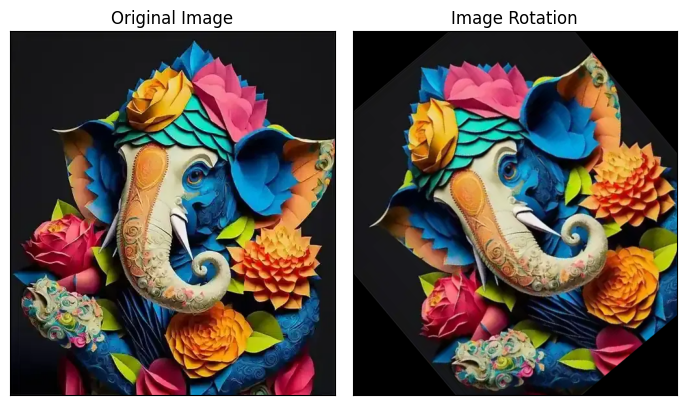

In [5]:
# Read image from disk.
img = cv2.imread('image\Ganeshji.webp')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Image rotation parameter
center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)
angle = 40
scale = 1

# getRotationMatrix2D creates a matrix needed for transformation.
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# We want matrix for rotation w.r.t center to 30 degree without scaling.
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (img.shape[1], img.shape[0]))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the Rotated image
axs[1].imshow(rotated_image)
axs[1].set_title('Image Rotation')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()

## Image Translation
Translating an image means shifting it within a given frame of reference that can be along the x-axis and y-axis.

In [21]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

height = image_rgb.shape[0]
width = image_rgb.shape[1]

tx = 100
ty = 70

# Translation matrix
translation_matrix = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32)
# warpAffine does appropriate shifting given the Translation matrix.
translated_image = cv2.warpAffine(image_rgb, translation_matrix, (width, height))

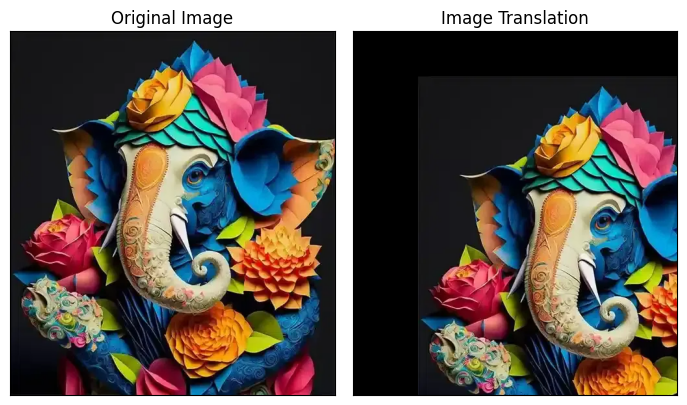

In [29]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))
# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
# Plot the transalted image
axs[1].imshow(translated_image)
axs[1].set_title('Image Translation')
# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()

## Image shearing 
is a geometric transformation that skews an image along one or both axes i.e x or y axis.



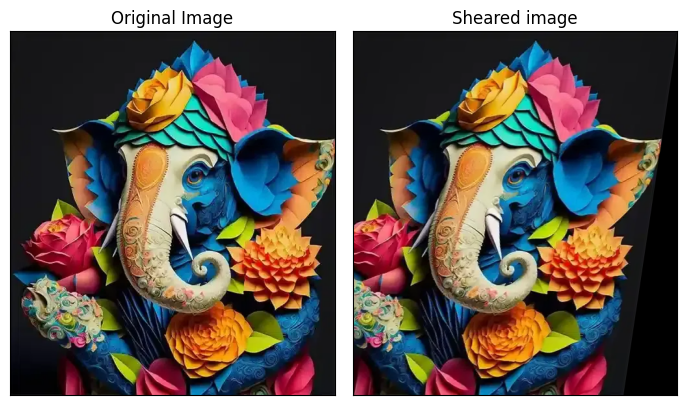

In [34]:
# Define the Shearing factor
shearX = -0.15
shearY = 0

# Define the Transformation matrix for shearing
transformation_matrix = np.array([[1, shearX, 0], 
                                  [0, 1, shearY]], dtype=np.float32)

# Apply shearing
sheared_image = cv2.warpAffine(image_rgb, transformation_matrix, (width, height))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the Sheared image
axs[1].imshow(sheared_image)
axs[1].set_title('Sheared image')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()

## Image Normalization
Image normalization is a process of scaling the pixel values in an image to a specific range.

[[0.08627451 0.08627451 0.08627451 ... 0.08627451 0.10588235 0.16078431]
 [0.08627451 0.08627451 0.08627451 ... 0.05882353 0.08235294 0.1372549 ]
 [0.08627451 0.08627451 0.08627451 ... 0.0745098  0.09411765 0.14901961]
 ...
 [0.08235294 0.02745098 0.00784314 ... 0.08235294 0.09019608 0.11764706]
 [0.10588235 0.05098039 0.03137255 ... 0.09019608 0.09803922 0.1254902 ]
 [0.11764706 0.0627451  0.04705882 ... 0.09803922 0.10980392 0.1372549 ]]


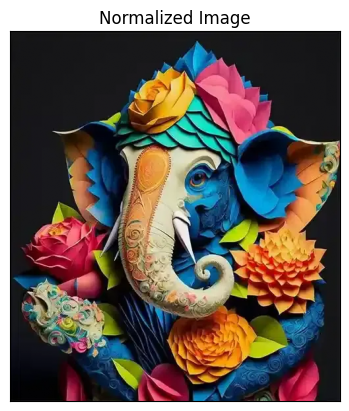

In [38]:
# Split the image into channels
b, g, r = cv2.split(image_rgb)

# Normalization parameter
min_value = 0
max_value = 1
norm_type = cv2.NORM_MINMAX

# Normalize each channel
b_normalized = cv2.normalize(b.astype('float'), None, min_value, max_value, norm_type)
g_normalized = cv2.normalize(g.astype('float'), None, min_value, max_value, norm_type)
r_normalized = cv2.normalize(r.astype('float'), None, min_value, max_value, norm_type)

# Merge the normalized channels back into an image
normalized_image = cv2.merge((b_normalized, g_normalized, r_normalized))
# Normalized image
print(normalized_image[:,:,0])

plt.imshow(normalized_image)
plt.xticks([])
plt.yticks([])
plt.title('Normalized Image')
plt.show()